<a href="https://colab.research.google.com/github/kapilkn/ML/blob/master/ML_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering - Zoo animal Clustering
Kapil Nagwanshi

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
cd gdrive

/content/gdrive


In [3]:
cd 'My Drive'

/content/gdrive/My Drive


In [4]:
cd 'Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [6]:
df = pd.read_csv('zoo.csv')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
df.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [9]:
labels = df['class_type']
print(np.unique(labels.values))

[1 2 3 4 5 6 7]


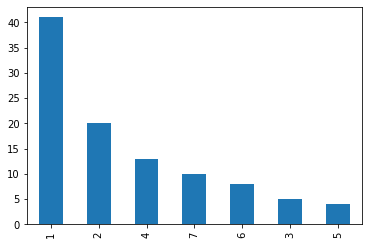

In [13]:
fig,axes = plt.subplots()
(labels.value_counts()).plot(ax=axes,kind='bar')

In [14]:
features = df.values[:,1:-1]
features.shape

(101, 16)

In [0]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

In [0]:
model = AgglomerativeClustering(n_clusters=7, linkage='average',affinity="cosine")

In [18]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=7)

In [19]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0])

In [20]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [0]:
labels = labels -1

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
score = mean_squared_error(labels,model.labels_)

In [24]:
abs_error = np.sqrt(score)
print(abs_error)

2.4373333911071624


**End of first project**

# Cluster based incentivization
Key Terms: K-means, elbow

**Kapil Nagwanshi**


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16,12)

In [0]:
df1 = pd.read_csv('driver-data.csv')

In [41]:
df1.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [42]:
df1.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [0]:
from sklearn.cluster import KMeans

In [0]:
kmeans = KMeans(n_clusters=2)
df_analyze = df1.drop('id',axis=1)

In [45]:
df_analyze.describe()

,mean_dist_day,mean_over_speed_perc
count,4000.000000,4000.000000
mean,76.041523,10.721000
std,53.469563,13.708543
min,15.520000,0.000000
25%,45.247500,4.000000
50%,53.330000,6.000000
75%,65.632500,9.000000
max,244.790000,100.000000


In [46]:
kmeans.fit(df_analyze)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
kmeans.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [48]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [49]:
print(kmeans.cluster_centers_)
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


In [52]:
df_analyze.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


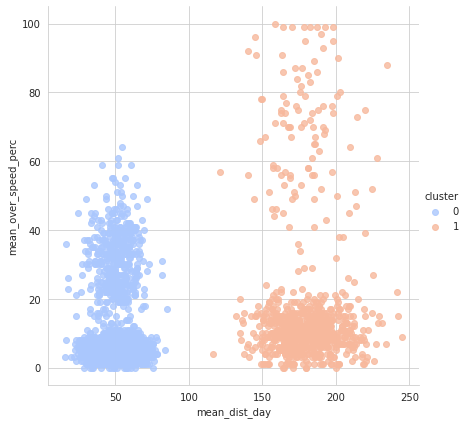

In [53]:
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
           hue='cluster',palette='coolwarm', size =6,aspect=1,fit_reg=False)

In [0]:
kmeans_4 =KMeans(n_clusters=4)

In [55]:
kmeans_4.fit(df1.drop('id',axis=1))
kmeans_4.fit(df1.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
print(type(kmeans_4.labels_))
unique, counts = np.unique(kmeans_4.labels_,return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique, counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [177.83509615  70.28846154]
 [ 50.40482436  32.36533958]]
<class 'numpy.ndarray'>
{0: 2773, 1: 696, 2: 104, 3: 427}


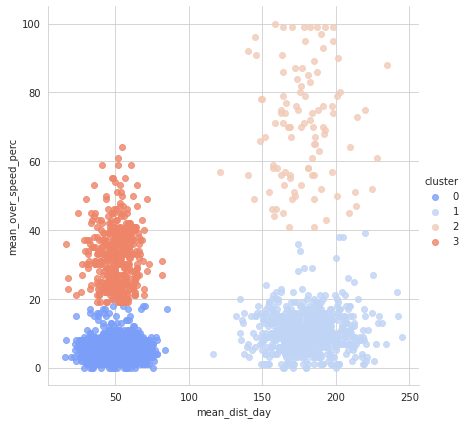

In [56]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
           hue='cluster',palette='coolwarm', size =6,aspect=1,fit_reg=False)